## Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
## Delivery_time -> Predict delivery time using sorting time 
### (Use Dataset 'delivery_time')

### Importing Libraries and Dataset

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api
from statsmodels.graphics.regressionplots import influence_plot

In [8]:
del_time=pd.read_csv("C:\Vishal\ExcelR\Data Science\Assignments\delivery_time.csv")
del_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Performing Exploratory Data Analysis

In [9]:
del_time.info()
#No Null values detected & correct data types present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [10]:
#Feature Engineering - Renaming columns
del_time.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1,inplace=True)

<AxesSubplot:>

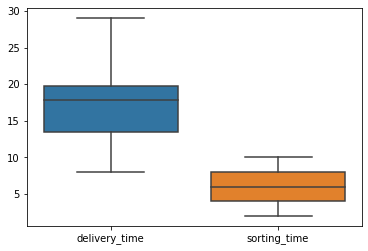

In [11]:
#Checking for outliers
sns.boxplot(data=del_time)
#No outliers detected

### Correlation Analysis

<AxesSubplot:>

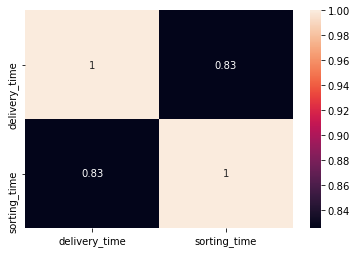

In [12]:
#Finding correlation using Heatmap
sns.heatmap(del_time.corr(),annot=True)
#We're having a good positive correlation of 0.98 between the variables

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

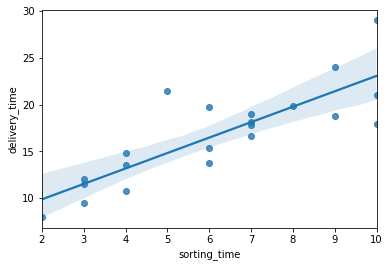

In [13]:
sns.regplot(x=del_time['sorting_time'],y=del_time['delivery_time'])

### Building the model

In [14]:
#Identifying Feature x and Target y and Initializing the Model
Regression_Model=sm.ols('delivery_time~sorting_time',data=del_time).fit()

### Model Testing

In [15]:
#Calculating coefficient parameters
print(Regression_Model.params)

Intercept       6.582734
sorting_time    1.649020
dtype: float64


In [16]:
#Calculating t-values & p-values
print(Regression_Model.tvalues,'\n',Regression_Model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [17]:
print('r-squared value: ',Regression_Model.rsquared,'r-squared adjusted value: ',Regression_Model.rsquared_adj)

r-squared value:  0.6822714748417231 r-squared adjusted value:  0.6655489208860244


### Model Tranformation - Rebuilding to improve accuracy

Transforming variables for accuracy

In [34]:
Regression_Model_1=sm.ols('delivery_time~np.log(sorting_time)',data=del_time).fit()

In [35]:
#Calculating coefficient parameters
print(Regression_Model_1.params)

Intercept               1.159684
np.log(sorting_time)    9.043413
dtype: float64


In [36]:
#Calculating t-values & p-values
print(Regression_Model_1.tvalues,'\n',Regression_Model_1.pvalues)

Intercept               0.472460
np.log(sorting_time)    6.586789
dtype: float64 
 Intercept               0.641980
np.log(sorting_time)    0.000003
dtype: float64


In [37]:
print('r-squared value: ',Regression_Model_1.rsquared,'r-squared adjusted value: ',Regression_Model_1.rsquared_adj)

r-squared value:  0.6954434611324223 r-squared adjusted value:  0.6794141696130761


Exponential transformation

In [40]:
Regression_Model_2 = sm.ols('np.log(delivery_time)~sorting_time',data=del_time).fit()

In [41]:
#Calculating coefficient parameters
print(Regression_Model_2.params)

Intercept       2.121372
sorting_time    0.105552
dtype: float64


In [42]:
#Calculating t-values & p-values
print(Regression_Model_2.tvalues,'\n',Regression_Model_2.pvalues)

Intercept       20.601357
sorting_time     6.836088
dtype: float64 
 Intercept       1.857343e-14
sorting_time    1.592708e-06
dtype: float64


In [43]:
print('r-squared value: ',Regression_Model_2.rsquared,'r-squared adjusted value: ',Regression_Model_2.rsquared_adj)

r-squared value:  0.7109478980584187 r-squared adjusted value:  0.6957346295351776


In [45]:
# Comparing Model Accuracy
d = {'Models': ['Regression_Model', 'Regression_Model_1', 'Regression_Model_2'], 'Adjusted rsquare': [Regression_Model.rsquared_adj, Regression_Model_1.rsquared_adj, Regression_Model_2.rsquared_adj]}
df = pd.DataFrame(d)
df

,Models,Adjusted rsquare
0,Regression_Model,0.665549
1,Regression_Model_1,0.679414
2,Regression_Model_2,0.695735


As the accuracy is increased from 66.55 % to 69.57% and highest for Regression_Model_2 we'll use that model for prediction

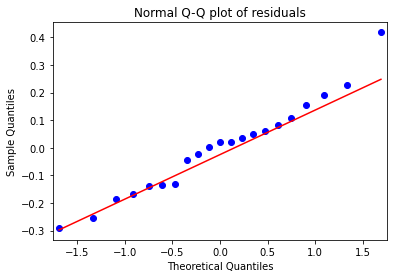

In [46]:
statsmodels.api.qqplot(Regression_Model_2.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

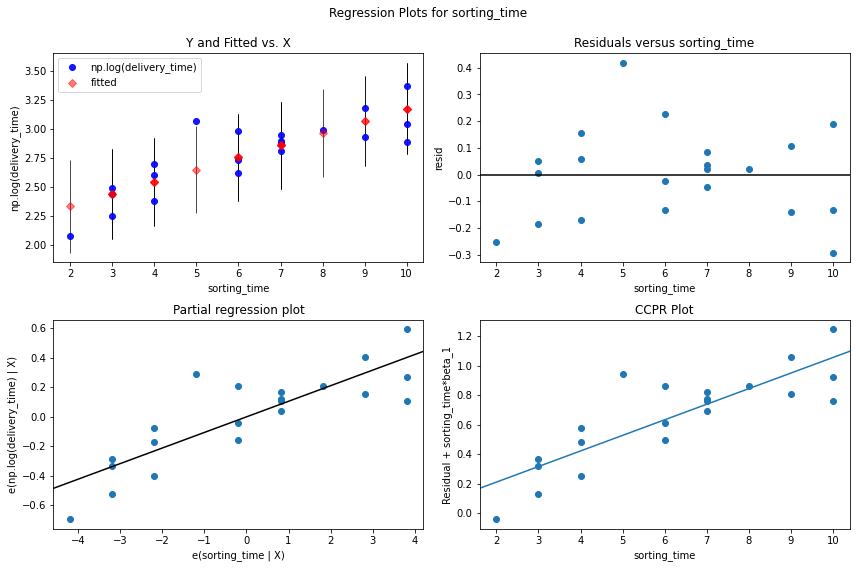

In [47]:
#defining figure size
fig = plt.figure(figsize=(12,8))
#producing regression plots
fig = statsmodels.api.graphics.plot_regress_exog(Regression_Model_2, 'sorting_time', fig=fig)

### Testing the model

In [50]:
#Making prediction using given data (taking exponential as we've used log while building the model)
#Comparing Actual and Predicted Delivery Time
del_time_act = pd.DataFrame(del_time.delivery_time)
del_time_pred = pd.DataFrame(np.exp(Regression_Model_2.predict()),columns=['Predicted Delivery Time'])
pd.concat([del_time_act, del_time_pred], axis = 1)

,delivery_time,Predicted Delivery Time
0,21.00,23.972032
1,13.50,12.725123
2,19.75,15.716034
3,24.00,21.570707
4,29.00,23.972032
5,15.35,15.716034
6,19.00,17.465597
7,9.50,11.450423
8,17.90,23.972032
9,18.75,21.570707


Text(0, 0.5, 'Delivery Time')

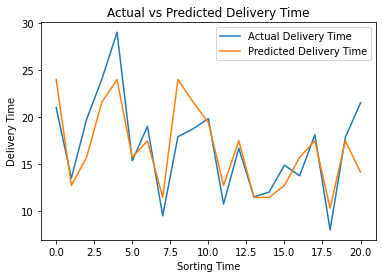

In [52]:
#Plotting graph of actual delivery time vs predicted delivery time
#plt.plot(del_time.sorting_time)
plt.plot(del_time_act)
plt.plot(del_time_pred)
plt.legend(['Actual Delivery Time','Predicted Delivery Time'])
plt.title("Actual vs Predicted Delivery Time")
plt.xlabel("Sorting Time")
plt.ylabel("Delivery Time")

### Predicting Delivery Time Using Model!

In [54]:
## r-squared value is 0.68 hence model can be used for prediction!
x = (int(input("Enter the Sorting Time : ")))
np.asarray(x)
x = pd.DataFrame([x], columns = ['sorting_time'])
print('The expected Delivery Time is: ', np.exp(Regression_Model_2.predict(x)))

Enter the Sorting Time : 12
The expected Delivery Time is:  0    29.606414
dtype: float64
